In [ ]:
# load basic packages
import pandas as pd
!pip install flair
from itertools import combinations, product
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

# load Flair and NLTK
import torch
from flair.data import Sentence
from flair.models import SequenceTagger
from nltk import tokenize

import nltk
nltk.download('punkt')


     |████████████████████████████████| 450kB 5.6MB/s 
     |████████████████████████████████| 983kB 21.5MB/s 
     |████████████████████████████████| 19.7MB 1.4MB/s 
     |████████████████████████████████| 1.1MB 41.6MB/s 
     |████████████████████████████████| 798kB 33.2MB/s 
     |████████████████████████████████| 1.3MB 30.6MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 890kB 28.3MB/s 
     |████████████████████████████████| 2.9MB 38.4MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=0052eba71f12bcd3d676f086a9edfb8f626c931bb5643a62e7261d77202dd9a9
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116678 sha256=041f0b97d7e917da456e51cdcbe265e1ee138cdb2f3f594314f0e387741eaf99
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad4

True

In [ ]:
#No es necesario correr esta celda, esto lo usé pero luego guardé el archivo.
#!pip install goose3
#from goose3 import Goose

#urls = df['url']
#with Goose() as g:
  #for i in range(len(urls)): 
   # article = g.extract(url=df['url'].iloc[i])
    #df['content'].iloc[i]=article.cleaned_text

     |████████████████████████████████| 92kB 3.2MB/s 


NameError: ignored

In [ ]:
import pandas as pd 
df=pd.read_csv('datos.csv')
df = df[df['content'].notna()]
df

,url,content,date
3,https://www.eluniversal.com.mx/ciencia-y-salud...,"Hasta ahora, esta cepa ha sido detectada en al...",2021-02-03
16,https://www.eluniversal.com.mx/nacion/video-mu...,"Estuve en Poza Rica, Veracruz. Laura me pidió ...",2021-02-03
19,https://www.eluniversal.com.mx/espectaculos/mu...,"“Mi papá no dejó muchos discos grabados, había...",2021-02-03
21,https://www.eluniversal.com.mx/estados/periodi...,“Se encontraba muy molesta con el suscrito por...,2021-02-03
34,https://www.eluniversal.com.mx/metropoli/semaf...,"“Estamos próximos al Día de la Candelaria, por...",2021-02-03
...,...,...,...
100,https://www.milenio.com/politica/amlo-propone-...,El presidente Andrés Manuel López Obrador envi...,2021-02-03
101,https://www.milenio.com/politica/jose-antonio-...,Con poco más del 16 por ciento de los votos ob...,2021-02-03
102,https://www.milenio.com/politica/elecciones-20...,Las mujeres adultas mayores y con edades de lo...,2021-02-03
103,https://www.milenio.com/politica/detente-amlo-...,"""Pandemia, inflación, prianista, conservador, ...",2021-02-03


In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download es_core_news_sm

     |████████████████████████████████| 16.2MB 5.0MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-cp36-none-any.whl size=16172935 sha256=7a5a75f3ed2ac74515d27354fd6df9ff625311e6a8d300a62b053f3d3df76ea0
  Stored in directory: /tmp/pip-ephem-wheel-cache-e_j749j6/wheels/05/4f/66/9d0c806f86de08e8645d67996798c49e1512f9c3a250d74242
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [ ]:
import es_core_news_sm
import numpy as np 
nlp = es_core_news_sm.load()
from spacy import displacy

entities=[]
for art in df['content']:
  art = re.sub('\r', '', art)
  art = re.sub('\n', ' ', art)
  art = re.sub("“", '', art)
  art = re.sub("”", '', art)
  art = re.sub("'", '', art)
  doc=nlp(art)
  entities_art = []
  entities_tot = []
  for ent in doc.ents:
      if(ent.label_=="PER" or ent.label_=="ORG") and ent.text not in entities_art:
        if ent.text not in entities_tot:
          entities_tot.append(ent.text)
        entities_art.append(ent.text)
  entities.append(entities_art)

entities

[['Vega Magaña'],
 [],
 ['María Eugenia Flores',
  'Chava Flores',
  'Flores',
  'Chava',
  'José Alfredo',
  'no. A',
  'Fonoteca Nacional',
  'Sería',
  'Aquí',
  'Mauricio Garcés',
  'Jaime Almeida',
  'Álvaro Carrillo Jr',
  'Ema Elena Valdelamar',
  'Ema Elena',
  'Darío Valdelamar',
  'Ojalá',
  'UNIVERSAL',
  'México',
  'Agustín Lara',
  'Tiburcio',
  'Francisco Gabilondo',
  'Francisco Gabilondo Soler',
  'Gabilondo Soler',
  'Fallaste',
  'Grítenme',
  'Qué rechulo',
  'Guitarras',
  'Alina Sánchez',
  'Pavel Granados',
  'Fonoteca Nacional de México',
  'Alejandro Cisneros',
  'Pavel'],
 [],
 [],
 ['Gather'],
 [],
 ['Screech',
  'Salvados',
  'Dustin Diamond',
  'Fast and Furious?',
  'Avión',
  'López Obrador',
  'Nobel'],
 ['CNPJF',
  'Instituto Nacional de Estadística y Geografía',
  'Fiscalía General de la República',
  'FGR',
  'Según'],
 ['Super Bowl', 'Raymond James Stadium', 'NFL'],
 ['Lovely Warren', 'Daniel Prude'],
 ['Ricardo Sheffield', 'Sheffield Padilla', 'Riñe

In [ ]:
weight=[]
for i in entities:
  for j in range(len(i)):
    for k in range(j+1,len(i)):
      weight.append([i[j],i[k],1])
weight=pd.DataFrame(weight,columns=['from','to','weight'])


In [ ]:
weight=weight.groupby(['from','to']).sum().sort_values('weight', ascending=False)
weight.head(15)

weight
from                           to                                 
México                         Andrés Manuel López Obrador       7
                               AstraZeneca                       5
Secretaría de Salud del Estado Lee                               3
Hugo López                     Gatell                            3
México                         ONU                               3
Andrés Manuel López Obrador    Cámara de Diputados               3
                               López Obrador                     3
México                         Marcelo Ebrard                    3
Andrés Manuel López Obrador    México                            3
México                         Cómo                              2
Enrique Alfaro Ramírez         Lee                               2
Presidente                     CRE                               2
Enrique Alfaro Ramírez         Enrique Alfaro                    2
Gatell                         Promoción de la Salud             2
AstraZeneca                    OMS                               2

In [ ]:
weight.loc[('Evita', 'Secretaría de Salud del Estado de Aguasalientes')].values[0]

1

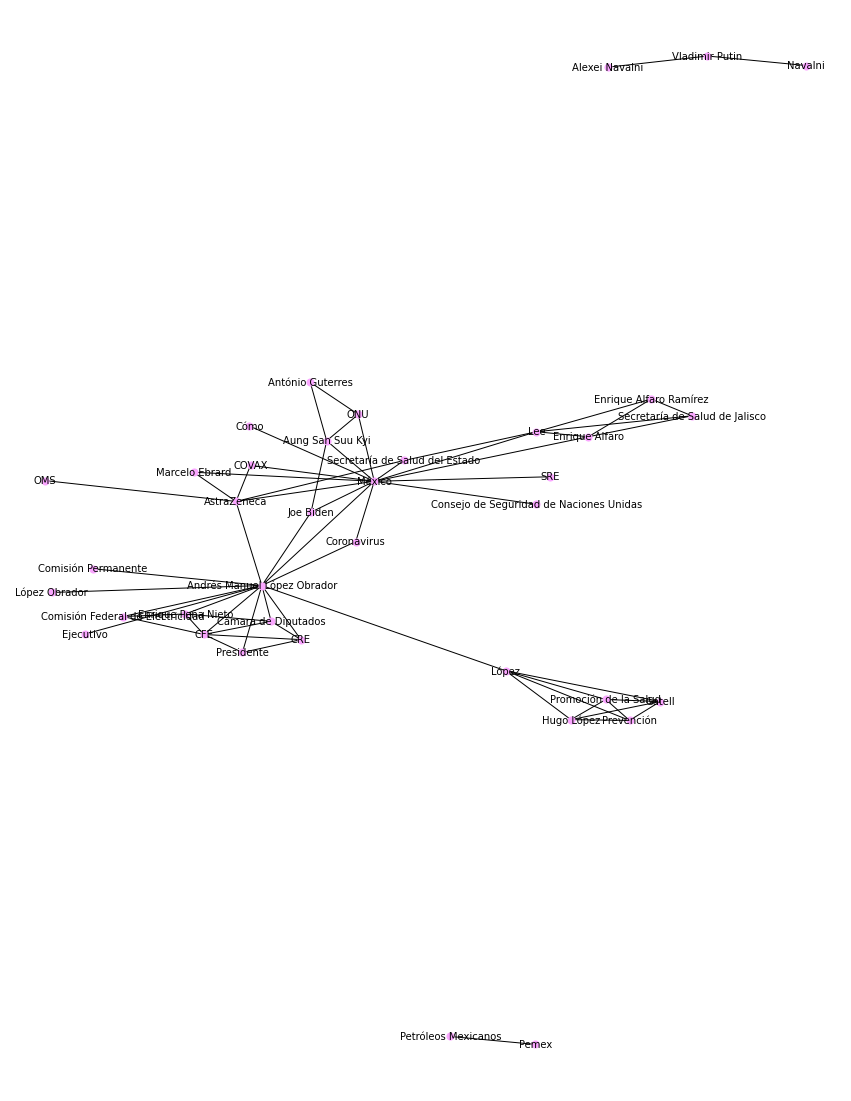

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(15,20))
G=nx.Graph()
pos = nx.kamada_kawai_layout(G)

for i in weight.index:
 if weight.loc[i].values[0]>=2:
  G.add_edge(i[0],i[1])

nx.draw(G, ax=axs, with_labels=True, node_color='#FAA6FF', font_size=10, node_size=50, font_family='sans-serif')

In [ ]:
d=[]
for i in G.degree:
  d.append(i[1])
AdjMatrix=nx.adjacency_matrix(G).toarray()
AdjMatrix

array([[0, 1, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [ ]:
import numpy as np 
store = [0]* 10;  
cliques=[]
def is_clique(b) :  
    for i in range(1, b) : 
        for j in range(i + 1, b) :   
            if (AdjMatrix[store[i]][store[j]] == 0) : 
                return False;  
    return True;  
  
def print_cli(n) :  
    clique=[]
    for i in range(1, n) : 
        clique.append(store[i])
    cliques.append(clique) 
  
def findCliques(i, l, s) : 
    for j in range( i + 1, len(d) -(s - l)) :    
        if (d[j] >= s - 1) : 
          store[l] = j;  
            if (is_clique(l + 1)) : 
                 if (l < s) : 
                   findCliques(j, l + 1, s);  
                  else : 
                    print_cli(l + 1);  
for k in range(5,2,-1):
  findCliques(0,1,k)
print(cliques)


[[5, 6, 16, 18, 19], [1, 8, 14, 31], [1, 8, 25, 31], [1, 13, 14, 31], [1, 24, 25, 31], [4, 12, 15, 30], [5, 6, 16, 18], [5, 6, 16, 19], [5, 6, 18, 19], [5, 16, 18, 19], [6, 16, 18, 19], [1, 8, 14], [1, 8, 25], [1, 8, 31], [1, 13, 14], [1, 13, 31], [1, 14, 31], [1, 24, 25], [1, 24, 31], [1, 25, 31], [4, 12, 15], [4, 12, 30], [4, 15, 30], [5, 6, 16], [5, 6, 18], [5, 6, 19], [5, 16, 18], [5, 16, 19], [5, 18, 19], [6, 16, 18], [6, 16, 19], [6, 18, 19], [7, 20, 21], [8, 14, 31], [8, 25, 31], [12, 15, 30], [13, 14, 31], [16, 18, 19], [24, 25, 31]]


In [ ]:
nodos=list(G.nodes)
for clique in cliques:
  tema=[]
  for entity in clique:
    tema.append(nodos[entity])
  print(tema)

['Hugo López', 'Gatell', 'Promoción de la Salud', 'Prevención', 'López']
['Andrés Manuel López Obrador', 'Cámara de Diputados', 'CRE', 'CFE']
['Andrés Manuel López Obrador', 'Cámara de Diputados', 'Enrique Peña Nieto', 'CFE']
['Andrés Manuel López Obrador', 'Presidente', 'CRE', 'CFE']
['Andrés Manuel López Obrador', 'Comisión Federal de Electricidad', 'Enrique Peña Nieto', 'CFE']
['Lee', 'Enrique Alfaro Ramírez', 'Enrique Alfaro', 'Secretaría de Salud de Jalisco']
['Hugo López', 'Gatell', 'Promoción de la Salud', 'Prevención']
['Hugo López', 'Gatell', 'Promoción de la Salud', 'López']
['Hugo López', 'Gatell', 'Prevención', 'López']
['Hugo López', 'Promoción de la Salud', 'Prevención', 'López']
['Gatell', 'Promoción de la Salud', 'Prevención', 'López']
['Andrés Manuel López Obrador', 'Cámara de Diputados', 'CRE']
['Andrés Manuel López Obrador', 'Cámara de Diputados', 'Enrique Peña Nieto']
['Andrés Manuel López Obrador', 'Cámara de Diputados', 'CFE']
['Andrés Manuel López Obrador', 'Pres